In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# sns.set_sTtyle('white')

In [2]:
import ipywidgets as widgets
from ipywidgets import interact

import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('./data/data_genre_encoded.csv')
df = df.set_index('artists', verify_integrity=True)
print(df.shape)
df.head()

(32539, 3245)


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,yugoslavnewwave,yugoslavrock,zambianpop,zen,zhongguofeng,zimurbangroove,zolo,zouk,zurichindie,zydeco
artists,,,,,,,,,,,,,,,,,,,,,
"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,...,0,0,0,0,0,0,0,0,0,0
"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,...,0,0,0,0,0,0,0,0,0,0
"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,...,0,0,0,0,0,0,0,0,0,0
"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,...,0,0,0,0,0,0,0,0,0,0
"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,...,0,0,0,0,0,0,0,0,0,0


What I'm going to do:
 - I'm going to consider all the numerical values as a vector for each track
 - Normalize the features or not?
 - Apply cosine similarity

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_normalized.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,yugoslavnewwave,yugoslavrock,zambianpop,zen,zhongguofeng,zimurbangroove,zolo,zouk,zurichindie,zydeco
artists,,,,,,,,,,,,,,,,,,,,,
"""Cats"" 1981 Original London Cast",0.372240,-0.468348,0.116791,-0.559858,-0.666763,0.487650,-0.615265,1.052563,-0.135077,-0.568447,...,-0.005544,-0.014669,-0.005544,-0.005544,-0.005544,-0.005544,-0.03328,-0.009602,-0.005544,-0.017533
"""Cats"" 1983 Broadway Cast",1.060428,-0.629133,0.244546,-0.445405,-0.454801,0.699573,0.057137,0.756501,-0.588119,-0.930391,...,-0.005544,-0.014669,-0.005544,-0.005544,-0.005544,-0.005544,-0.03328,-0.009602,-0.005544,-0.017533
"""Fiddler On The Roof” Motion Picture Chorus",1.044875,-1.158739,0.507793,-0.895058,-0.623914,0.769216,-0.758285,0.237899,-1.637212,-0.582458,...,-0.005544,-0.014669,-0.005544,-0.005544,-0.005544,-0.005544,-0.03328,-0.009602,-0.005544,-0.017533
"""Fiddler On The Roof” Motion Picture Orchestra",1.118778,-0.723536,0.090359,-1.047643,-0.477436,0.437785,-0.831672,0.280016,-1.175705,-0.512976,...,-0.005544,-0.014669,-0.005544,-0.005544,-0.005544,-0.005544,-0.03328,-0.009602,-0.005544,-0.017533
"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0.143436,-0.485108,0.138059,-0.140697,-0.669335,-0.092471,0.138538,0.058389,0.220791,-0.066867,...,-0.005544,-0.014669,-0.005544,-0.005544,-0.005544,-0.005544,-0.03328,-0.009602,-0.005544,-0.017533


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

beyonce_vector = df_normalized.loc['Beyoncé'].to_numpy().reshape(1,-1)
julieta_vector = df_normalized.loc['Julieta Venegas'].to_numpy().reshape(1,-1)

cosine_similarity(beyonce_vector, julieta_vector)

array([[-0.00130292]])

In [6]:
acdc_vector = df_normalized.loc['AC/DC'].to_numpy().reshape(1,-1)

cosine_similarity(beyonce_vector, acdc_vector)

array([[0.01684367]])

In [7]:
celine_vector = df_normalized.loc['Céline Dion'].to_numpy().reshape(1,-1)

cosine_similarity(acdc_vector, celine_vector)

array([[0.00801009]])

In [8]:
cosine_matrix = cosine_similarity(df_normalized)
cosine_matrix.shape

(32539, 32539)

In [9]:
cosine_df = pd.DataFrame(cosine_matrix, columns=df.index, index=df.index)
cosine_df.head()

artists,"""Cats"" 1981 Original London Cast","""Cats"" 1983 Broadway Cast","""Fiddler On The Roof” Motion Picture Chorus","""Fiddler On The Roof” Motion Picture Orchestra","""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast","""Joseph And The Amazing Technicolor Dreamcoat"" 1992 Canadian Cast","""Mama"" Helen Teagarden","""Test for Victor Young""","""Weird Al"" Yankovic",$0dg0d,...,麥志誠,黃品源,黑豹,龔詩嘉,김수철,김효근,나율,미스티,시온 Zion & 한해 Hanhae of 팬텀 Phantom,조정현
artists,,,,,,,,,,,,,,,,,,,,,
"""Cats"" 1981 Original London Cast",1.000000,0.124039,0.106069,0.107573,0.094865,0.097540,0.048733,0.044744,-0.001571,-0.051742,...,0.048255,-0.004846,-0.000671,-0.001385,0.001054,0.053942,0.023961,-0.057026,0.018835,0.002612
"""Cats"" 1983 Broadway Cast",0.124039,1.000000,0.792262,0.787704,0.660130,0.525614,0.207383,0.330814,-0.007844,-0.276694,...,0.328311,-0.021912,-0.004458,-0.001960,0.013973,0.546547,0.425083,-0.156906,0.103677,0.023042
"""Fiddler On The Roof” Motion Picture Chorus",0.106069,0.792262,1.000000,0.967289,0.529795,0.362658,0.092926,0.065932,-0.011337,-0.470731,...,0.037498,-0.025211,-0.013999,0.005594,0.025818,0.475673,0.503807,-0.237297,0.156941,0.023855
"""Fiddler On The Roof” Motion Picture Orchestra",0.107573,0.787704,0.967289,1.000000,0.543856,0.434415,0.151540,0.068341,-0.010010,-0.447285,...,0.075728,-0.024839,-0.013595,0.004033,0.024822,0.433328,0.556584,-0.228973,0.178566,0.022517
"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0.094865,0.660130,0.529795,0.543856,1.000000,0.609813,0.144481,0.126181,-0.002148,0.014049,...,0.665325,-0.017358,0.008554,0.003057,0.003500,0.187540,0.559220,0.046716,0.043620,0.015421


In [10]:
cosine_df.loc['Beyoncé'].sort_values(ascending=False).iloc[1:10]

artists
Normani             0.870404
Selena              0.860297
Katy Perry          0.855901
Demi Lovato         0.855893
Hailee Steinfeld    0.855002
Selena Gomez        0.849671
Miley Cyrus         0.848606
Katy                0.843616
Lauren Jauregui     0.783446
Name: Beyoncé, dtype: float64

In [11]:
cosine_df.loc['AC/DC'].sort_values(ascending=False).iloc[1:10]

artists
Rose Tattoo        0.867502
Stevie Wright      0.836512
Sherbet            0.836290
Moving Pictures    0.834703
Peter Allen        0.832400
Vika & Linda       0.832136
Eurogliders        0.832031
Billy Thorpe       0.831590
Midnight Oil       0.811982
Name: AC/DC, dtype: float64

In [12]:
cosine_df.loc['Julieta Venegas'].sort_values(ascending=False).iloc[1:10]

artists
Juliet                    0.991802
León Larregui             0.880834
Bunbury                   0.879756
Draco Rosa                0.801619
Vilma Palma e Vampiros    0.788843
Vicentico                 0.787409
Aleks Syntek              0.707747
Elefante                  0.707624
Mon Laferte               0.698473
Name: Julieta Venegas, dtype: float64

In [13]:
acdc_similar = cosine_df.loc['AC/DC'].sort_values(ascending=False).iloc[:5].index
acdc_similar

Index(['AC/DC', 'Rose Tattoo', 'Stevie Wright', 'Sherbet', 'Moving Pictures'], dtype='object', name='artists')

In [14]:
df.loc[acdc_similar]

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,yugoslavnewwave,yugoslavrock,zambianpop,zen,zhongguofeng,zimurbangroove,zolo,zouk,zurichindie,zydeco
artists,,,,,,,,,,,,,,,,,,,,,
AC/DC,0.031215,0.468503,265618.406897,0.848490,2.346051e-01,0.283318,-4.830276,0.072359,129.482448,0.494143,...,0,0,0,0,0,0,0,0,0,0
Rose Tattoo,0.055778,0.478333,185733.333333,0.890667,1.571167e-01,0.198733,-8.839333,0.044667,135.010000,0.680000,...,0,0,0,0,0,0,0,0,0,0
Stevie Wright,0.036900,0.481000,240000.000000,0.950000,2.120000e-04,0.373000,-3.923000,0.112000,89.866000,0.786000,...,0,0,0,0,0,0,0,0,0,0
Sherbet,0.430000,0.405000,225560.000000,0.703000,1.030000e-05,0.135000,-4.717000,0.034800,108.855000,0.651000,...,0,0,0,0,0,0,0,0,0,0
Moving Pictures,0.272120,0.579400,221612.800000,0.630200,2.400000e-07,0.142700,-10.065800,0.029300,132.873000,0.317800,...,0,0,0,0,0,0,0,0,0,0


## How to visualize what these artists have in common?

Can I see differences in the distribution of the similar artists?

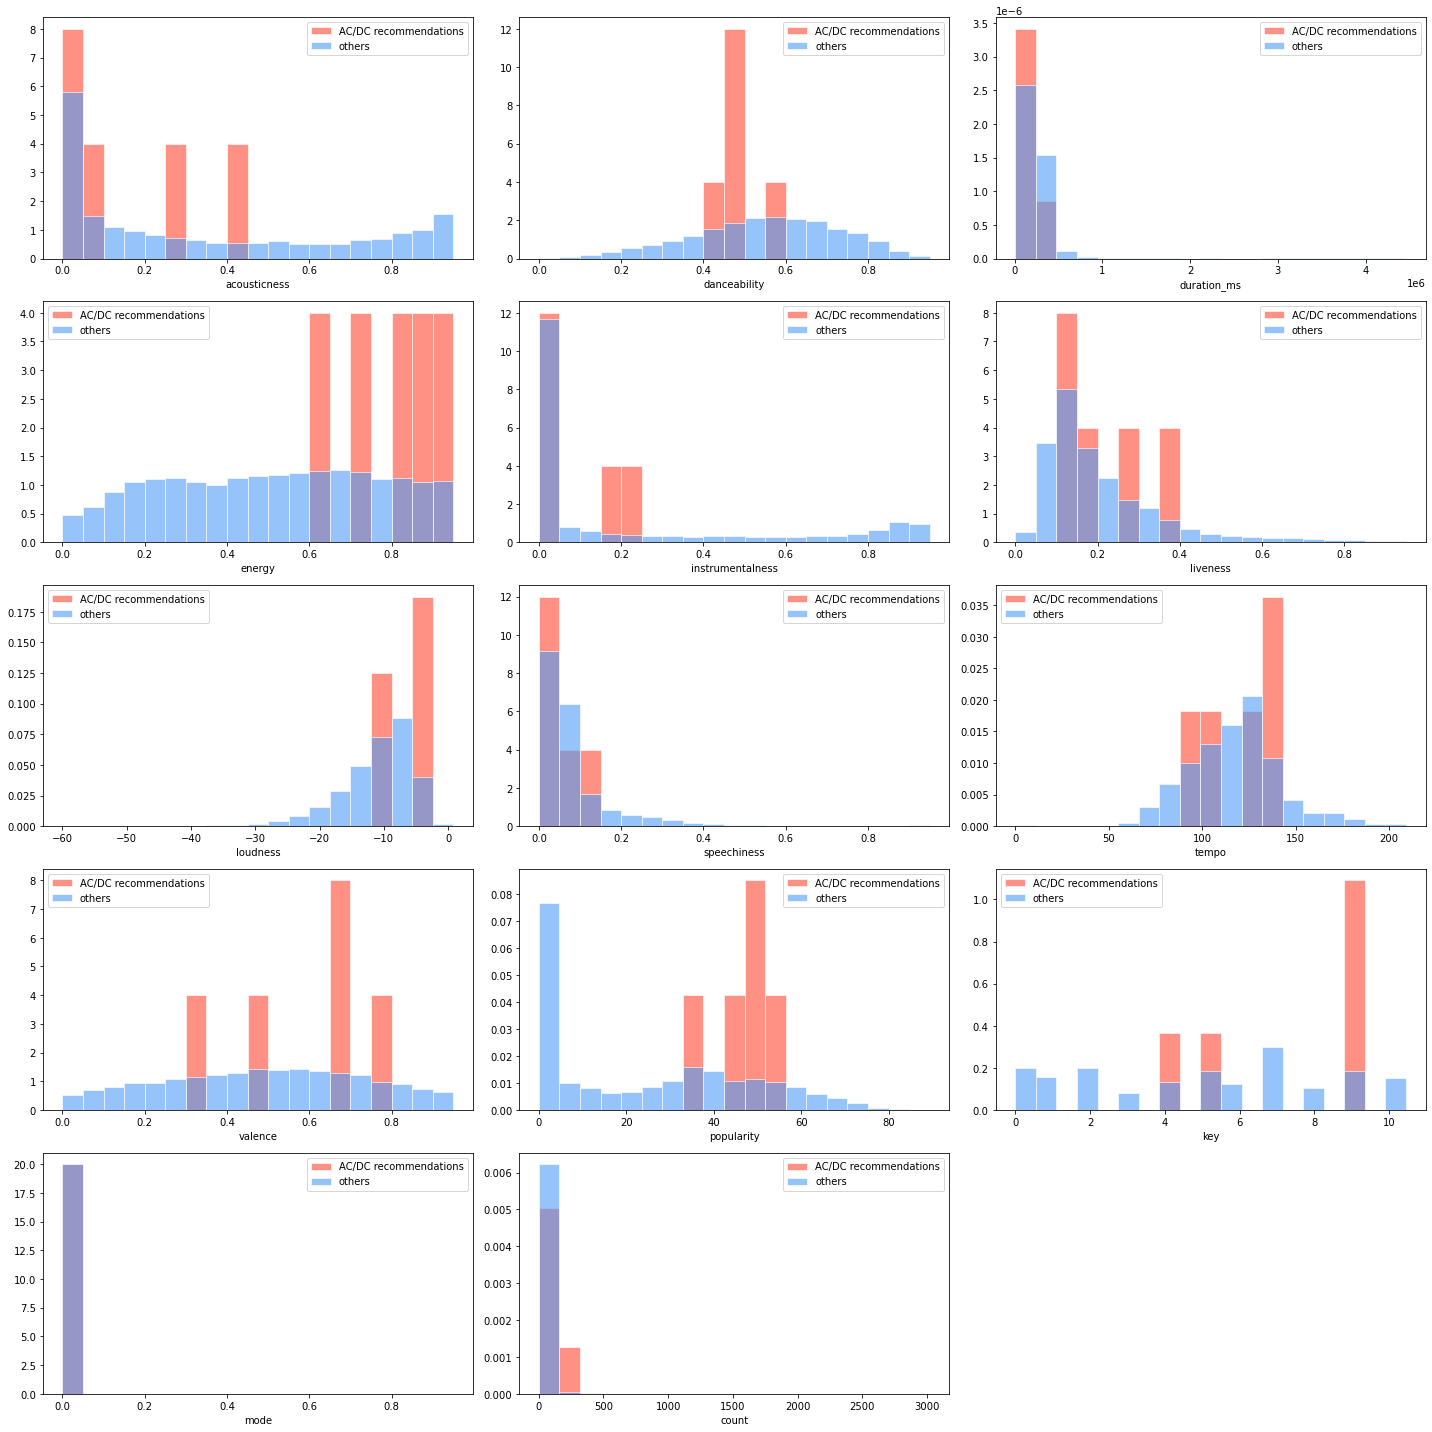

In [15]:
colors = ['#509bf5', '#ff4632']

acdc_similar = cosine_df.loc['AC/DC'].sort_values(ascending=False).iloc[:5].index
variables = df.columns[:14]

acdc_subset = df.loc[acdc_similar][variables]
not_acdc_subset = df.loc[df.index.difference(acdc_similar)]

n_cols = 3
n_rows = int(np.ceil(len(variables) / n_cols))

fig = plt.figure(figsize=(20,20))


for i, variable in enumerate(variables):
    n_bins = 20
    step = np.ceil(df[variable].max() - df[variable].min() ) / n_bins
    bins = np.arange(df[variable].min(), df[variable].max(), step)

    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    
    acdc_subset[variable].hist(bins=bins, density=True, alpha=0.6, ax=ax, color=colors[1], edgecolor='white', label='AC/DC recommendations')
    not_acdc_subset[variable].hist(bins=bins, density=True, alpha=0.6, ax=ax, color=colors[0], edgecolor='white', label='others')

    ax.grid(False)
    ax.set_xlabel(variable)
    ax.legend()
    
plt.tight_layout()

In [16]:
df['duration_min'] = df['duration_ms'] / (1000*60)

variables = ['acousticness', 'danceability', 'duration_min', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count']

@interact
def clusters_plot(x=list(df[variables].columns), y=list(df.sample(5).index)):

    df_ri = df.reset_index()
    similar = cosine_df.loc[y].sort_values(ascending=False).iloc[:5].index
    df_ri['recomm'] = df_ri['artists'].apply(lambda x: 1 if x in similar else 0)
    
    fig = px.histogram(df_ri, x=x, histnorm='probability',
                     template='simple_white', color='recomm', color_discrete_sequence=colors)
    
    
    fig.show()

interactive(children=(Dropdown(description='x', options=('acousticness', 'danceability', 'duration_min', 'ener…

It doesn't seem to be any pattern in the distributions of the properties for similar artists...

## Distribution of the cosine

In [28]:
plt.fig(figsize(20,20))
cosine_df.iloc[:, 0].plot(kind="hist", bins=80)

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

## Trying Principal Components Analysis (PCA) to visualize position of similar artists in vector space

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_vis = pd.DataFrame(pca.fit_transform(df_normalized), columns=['trunc_var1', 'trunc_var2'], index=df_normalized.index).reset_index()

In [18]:
pca_components = pd.DataFrame(pca.components_, columns=df_normalized.columns)

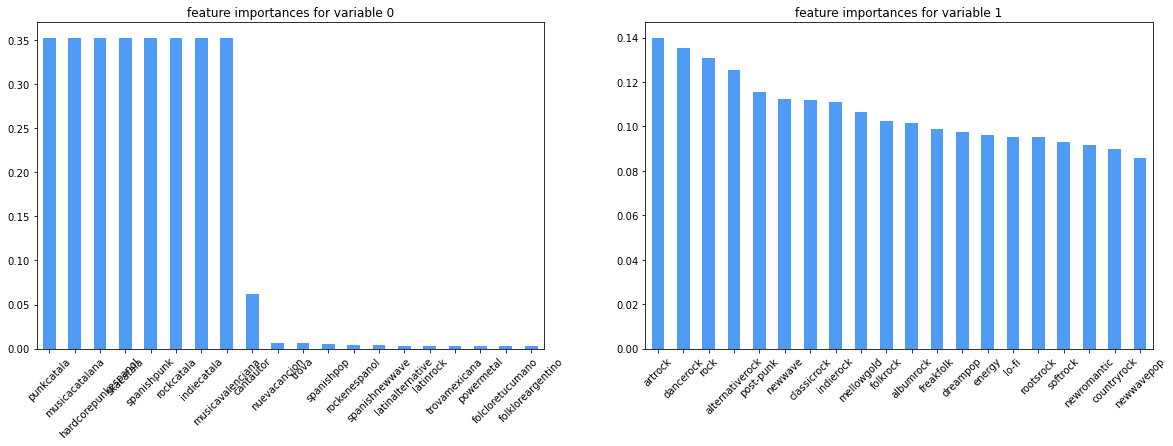

In [19]:
fig = plt.figure(figsize=(20,6))

for index, row in pca_components.iterrows():
    
    ax = fig.add_subplot(1,2,index + 1)
    
    pca_components.iloc[index,:].sort_values(ascending=False).head(20).plot(kind='bar', color=colors[0])
    
    plt.xticks(rotation=45)
    plt.title(f'feature importances for variable {index}')

Text(0.5, 1.0, 'Spatial similarity for AC/DC')

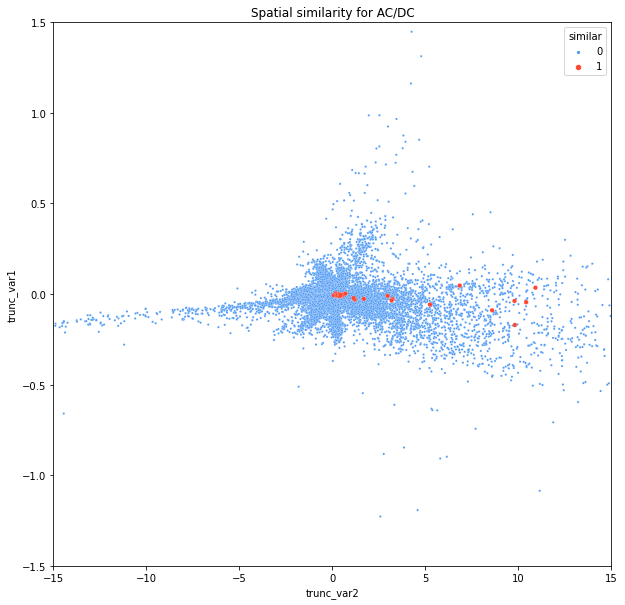

In [20]:
artist = 'AC/DC'
#artist = 'Beyoncé'
# artist = 'The Beatles'
similar = cosine_df.loc[artist].sort_values(ascending=False).iloc[:25].index

# artist = df.sample().index[0]
# similar = cosine_df.loc[artist].sort_values(ascending=False).iloc[:25].index

df_vis['similar'] = df_vis['artists'].apply(lambda x: 1 if x in similar else 0)
df_vis = df_vis.sort_values(by='similar')

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='trunc_var2', y='trunc_var1', data=df_vis, hue='similar', hue_order=[0,1], size='similar', sizes=[5, 20], palette=colors)
ax.axis([-15, 15, -1.5, 1.5])
plt.title(f'Spatial similarity for {artist}')